In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("password_predict_data.csv",error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
data.shape

(669640, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
data[data['password'].isna()]

,password,strength
367579,NaN,0


In [8]:
data.dropna(inplace=True)
data[data['password'].isna()]

,password,strength


<AxesSubplot:xlabel='strength', ylabel='count'>

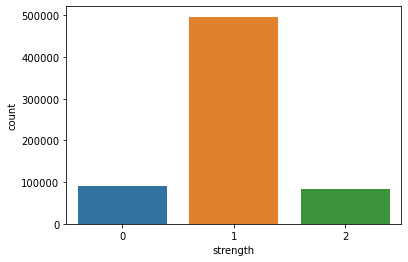

In [9]:
sns.countplot(data['strength'])

Thus, It is a type of imbalance dataset

### Save entire data into array

In [10]:
password_tuple=np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
import random 
random.shuffle(password_tuple)

In [12]:
# list comprehension==> to acess your indep feature
x= [labels[0] for labels in password_tuple]
y= [labels[1] for labels in password_tuple]

In [13]:
x

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'visi7k1yr',
 'visi7k1yr',
 'megzy123',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'as326159',
 'AVYq1lDE4MgAZfNt',
 'v1118714',
 'universe2908',
 'kzde5577',
 'jerusalem393',
 'WUt9IZzE0OQ7PkNE',
 'kino3434',
 'jerusalem393',
 'visi7k1yr',
 'kino3434',
 'as326159',
 'u6c8vhow',
 'elyass15@ajilent-ci',
 'jytifok873',
 'lamborghin1',
 '612035180tok',
 '6975038lp',
 'faranumar91',
 '0169395484a',
 'u6c8vhow',
 'gaymaids1',
 '612035180tok',
 'jerusalem393',
 'lamborghin1',
 'megzy123',
 'visi7k1yr',
 'faranumar91',
 'trabajonet9',
 'jerusalem393',
 'visi7k1yr',
 'kswa2mrv',
 'v1118714',
 'g067057895',
 'juliel009',
 'intel1',
 'klara-tershina3H',
 'u6c8vhow',
 'lsdlsd1',
 'pHyqueDIyNQ8vmhb',
 'gaymaids1',
 'idofo673',
 'asv5o9yu',
 'a2531106',
 'prisonbreak1',
 '0169395484a',
 'lsdlsd1',
 'ok>bdk',
 'pHyqueDIyNQ8vmhb',
 'megzy123',
 'jytifok873',
 'faranumar91',
 'olmaz.',
 'hpqkoxsn5',
 'fahad123',
 'go7kew7a2po',
 'ok>bdk',
 'lsdlsd1',
 'd04

In [14]:
# defing a function so that input split into chars

def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character
    

In [15]:
word_divide_char('trabajonet9')

['t', 'r', 'a', 'b', 'a', 'j', 'o', 'n', 'e', 't', '9']

passing data to TF-IDF algo

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# initilialize class: TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)


In [18]:
X=vectorizer.fit_transform(x)

In [19]:
X.shape # vector data

(669639, 124)

In [20]:
vectorizer.get_feature_names() # get all the features of your data

['\x02',
 '\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x12',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¾',
 '¿',
 '×',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'ƒ',
 '—',
 '‚',
 '…']

In [21]:
first_document_vector=X[0]
first_document_vector

<1x124 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [22]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56669637],
        [0.        ],
        [0.59140369],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [23]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['Tf-IDF'])

In [24]:
df

,Tf-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ÿ,0.0
ƒ,0.0
—,0.0
‚,0.0


In [25]:
# sort data on th basis of imp or tf-idf
df.sort_values(by=['Tf-IDF'],ascending=False)


,Tf-IDF
7,0.591404
5,0.566696
z,0.335982
k,0.292147
d,0.286002
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


### Passing data for modelling purpose X and y

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [28]:
X_train.shape

(535711, 124)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf=LogisticRegression(random_state=42,multi_class='multinomial')

In [31]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [32]:
dt=np.array(['$#@0125'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [33]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 2, 1, 1])

# Confusion Matrix and Accuarcy 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [35]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

print("Accuracy_score of model :" ,accuracy_score(y_test,y_pred))

[[ 5351 12516    15]
 [ 3991 92787  2677]
 [   48  5198 11345]]
Accuracy_score of model : 0.8174765545666328


<AxesSubplot:>

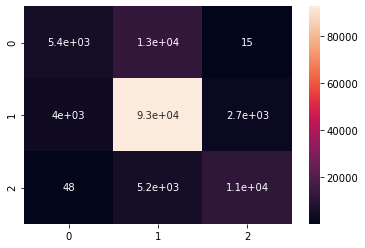

In [36]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17882
           1       0.84      0.93      0.88     99455
           2       0.81      0.68      0.74     16591

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



# Hyper Parameter tuning 

In [38]:

from sklearn.model_selection import  StratifiedKFold, GridSearchCV
from sklearn.model_selection import KFold,cross_val_score

In [39]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [40]:
clf1=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [41]:
y_pred=clf1.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

print("Accuracy is", clf.score(X_test, y_test)*100)
score = cross_val_score(log_class, X, y, cv=5,scoring = 'accuracy')
print("Cross validation is",np.mean(score)*100)

print("Classification Report:")
print(classification_report(y_test,y_pred))


Confusion matrix:
[[ 5284 12584    14]
 [ 3905 92814  2736]
 [   48  5104 11439]]
Accuracy is 81.74765545666328
Cross validation is 81.875159750396
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.30      0.39     17882
           1       0.84      0.93      0.88     99455
           2       0.81      0.69      0.74     16591

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

